In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
class RobustScaler:
    def __init__(self):
        self.median_ = None
        self.iqr_ = None
        
    def fit(self, X):
        X = np.asarray(X)
        self.median_ = np.median(X, axis=0)
        q75 = np.percentile(X, 75, axis=0)
        q25 = np.percentile(X, 25, axis=0)
        self.iqr_ = q75 - q25
        self.iqr_[self.iqr_ == 0] = 1.0
        return self
    
    def transform(self, X):
        X = np.asarray(X)
        if self.median_ is None or self.iqr_ is None:
            raise RuntimeError("RobustScaler instance is not fitted yet")
        return (X - self.median_) / self.iqr_
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [211]:
df=pd.read_csv(r'C:\Users\Premnand Dareddy\Downloads\Churn_Modelling.csv')

In [212]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [215]:
df.drop(df[df['Age'] > 60].index, inplace=True)
df.drop(df[df['Balance'] > 160000].index, inplace=True)
df.drop(df[df['EstimatedSalary'] > 150000].index, inplace=True)


In [216]:
for i in df.columns:
    print(i, df[i].nunique())

CreditScore 455
Geography 3
Gender 2
Age 43
Tenure 11
Balance 4142
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 6759
Exited 2


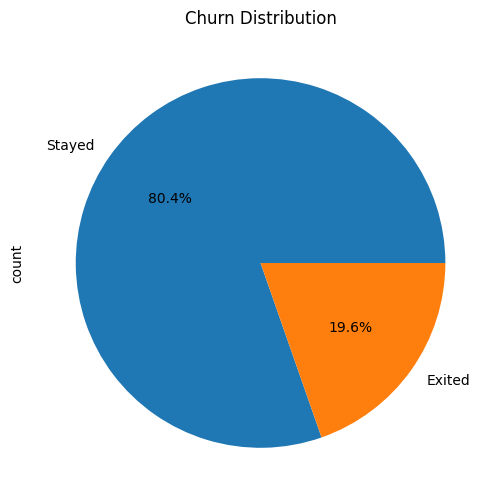

In [217]:
plt.figure(figsize=(6,6))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Stayed', 'Exited'])
plt.title('Churn Distribution')
plt.show()

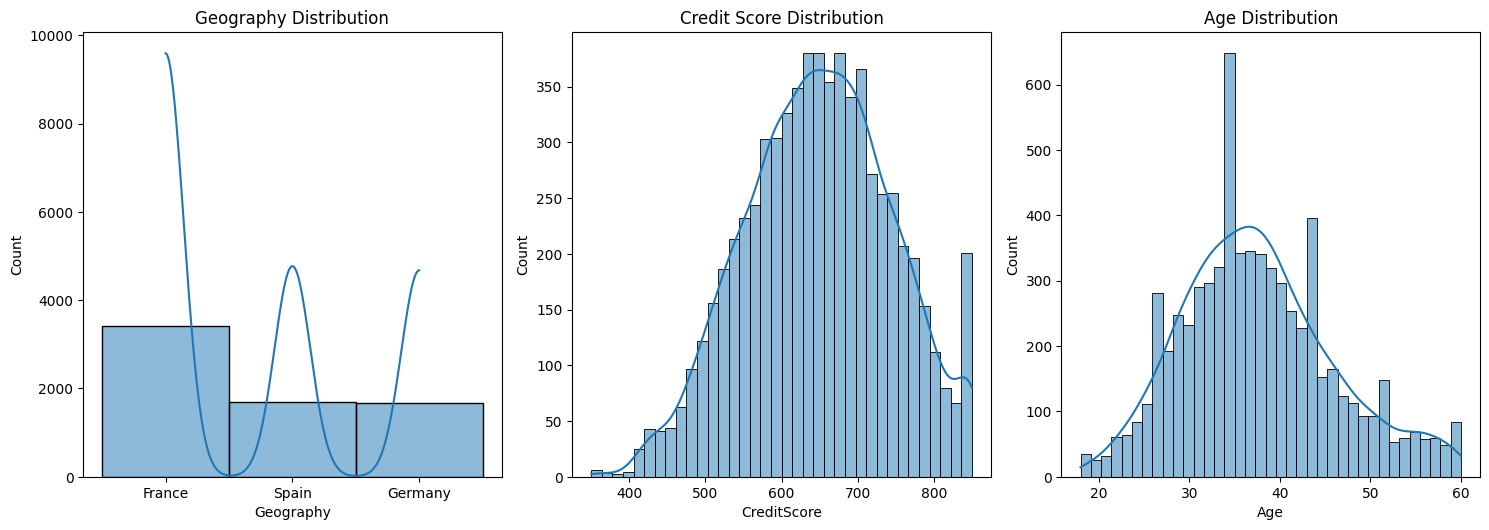

In [218]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.histplot(df['Geography'],kde=True)
plt.title('Geography Distribution')

plt.subplot(2,3,2)
sns.histplot(df['CreditScore'],kde=True)
plt.title('Credit Score Distribution')

plt.subplot(2,3,3)
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()



In [219]:
y=df.Exited
X=df.drop('Exited', axis='columns')
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 6760, dtype: int64

In [220]:
X=pd.get_dummies(X, columns=['Gender','Geography'],dtype=int)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [221]:
df1=pd.concat([X,y],axis='columns')
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1,0


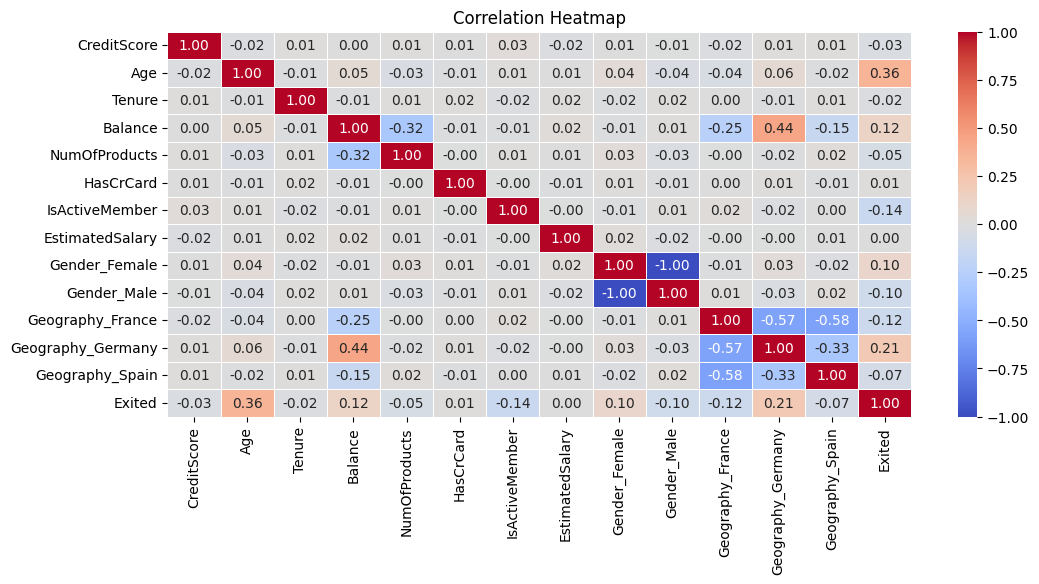

In [222]:
cm =df1.corr()
plt.figure(figsize=(12,5))
sns.heatmap(cm, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

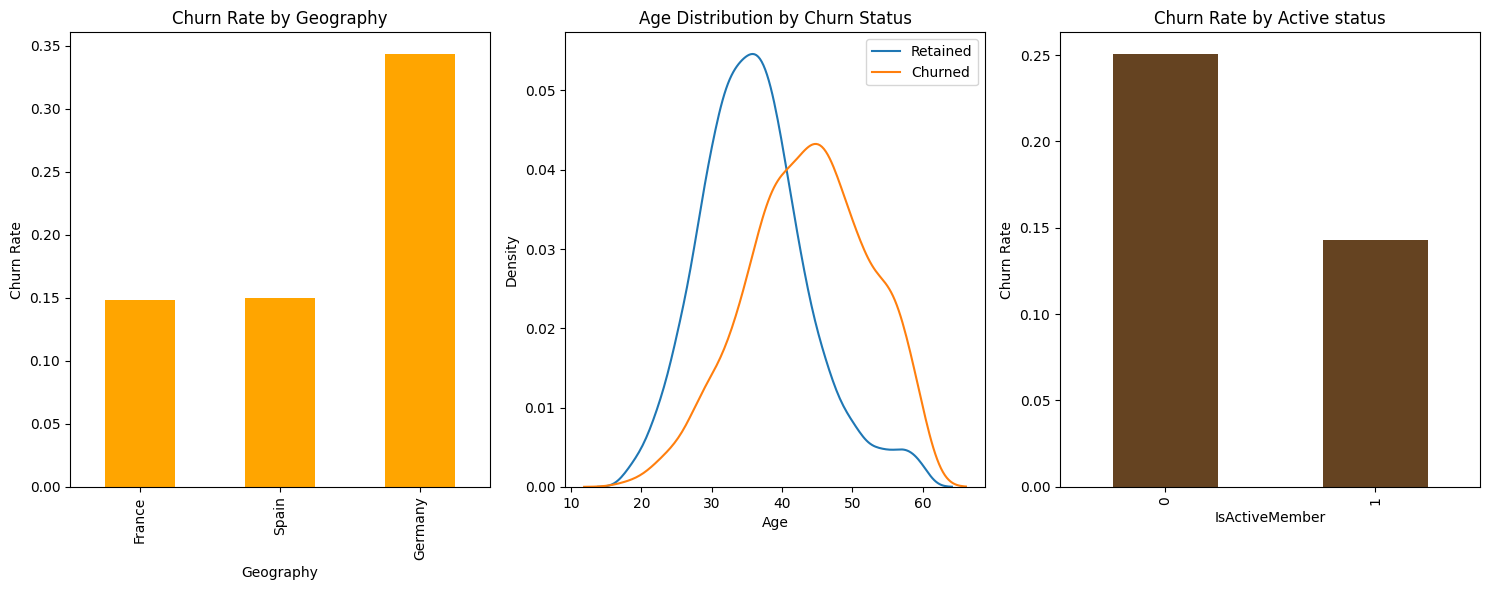

In [223]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
churn_rate_geo = df.groupby('Geography')['Exited'].mean().sort_values()
churn_rate_geo.plot(kind='bar', color='orange')
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.xlabel('Geography')

plt.subplot(1,3,2)
sns.kdeplot(df.loc[df['Exited']==0, 'Age'], label='Retained')
sns.kdeplot(df.loc[df['Exited']==1, 'Age'], label='Churned')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()


plt.subplot(1,3,3)
churn_by_tenure = df.groupby('IsActiveMember')['Exited'].mean()
churn_by_tenure.plot(kind='bar', color='#654321')
plt.title('Churn Rate by Active status')
plt.xlabel('IsActiveMember')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()


In [224]:
X = X.to_numpy()
y=y.to_numpy()
scaler = RobustScaler()
X = scaler.fit_transform(X)

X

array([[-0.2406015 ,  0.45454545, -0.6       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.32330827,  0.36363636, -0.8       , ..., -1.        ,
         0.        ,  1.        ],
       [-1.12030075,  0.45454545,  0.6       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.43609023, -0.09090909,  0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.90977444,  0.45454545, -0.4       , ..., -1.        ,
         1.        ,  0.        ],
       [ 1.06015038, -0.81818182, -0.2       , ...,  0.        ,
         0.        ,  0.        ]], shape=(6760, 13))

In [225]:
X.shape

(6760, 13)

In [226]:
y.shape

(6760,)

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [228]:
X_test.shape

(1352, 13)

NAIVE BAYES

In [229]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)


In [230]:
from scipy.stats import multivariate_normal as mvn

In [231]:
class GaussNB():
    def fit(self, X, y, epsilon= 1e-6):
        self.likelihoods= dict()
        self.priors= dict()
        self.K=set(y.astype(int))

        for k in self.K:
            X_k =X[y==k]
            self.likelihoods[k]={"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0)+epsilon}
            self.priors[k]=len(X_k)/len(X)

    def predict(self, X):
        N,D =X.shape
        P_hat= np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
            P_hat[:,k]= mvn.logpdf(X,l["mean"], l["cov"],allow_singular=True)+np.log(self.priors[k])
        
        return P_hat.argmax(axis=1)
        
        

In [232]:
gnb=GaussNB()

In [233]:
gnb.fit(X_train, y_train)

In [234]:
y_hat_train1=gnb.predict(X_train)
y_hat_test1=gnb.predict(X_test)

In [235]:
print(f"Training Accuracy:{accuracy(y_train,y_hat_train1):0.4f}")
print(f"Testing Accuracy:{accuracy(y_test,y_hat_test1):0.4f}")

Training Accuracy:0.8295
Testing Accuracy:0.8269


Precision: 0.575
Recall: 0.459


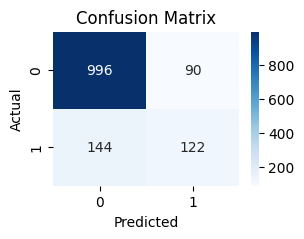

In [236]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

print(f"Precision: {precision_score(y_test, y_hat_test1):.3f}")
print(f"Recall: {recall_score(y_test, y_hat_test1):.3f}")

cm = confusion_matrix(y_test, y_hat_test1)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SHALLOW ANN 

In [237]:
def linear(H):
    return H
def sigmoid(H):
    return 1/(1+np.exp(-H))
def ReLU(H):    #non-ve linear, zero and above.
    return H*(H>0)
def softmax(H):
    H = np.array(H)
    eH = np.exp(H)
    return eH / eH.sum(axis=1, keepdims=True)


In [238]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N, K))
    if hasattr(y, "iloc"):
        for i in range(N):
            Y[i, y.iloc[i]] = 1
    else:
        for i in range(N):
            Y[i, y[i]] = 1
    return Y

def cross_entropy(y,p_hat):
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [239]:
class Shallow_ANN():

    def fit(self,X,y,neurons=6,eta=1e-3,epochs=1e3,show_curve=True):
        epochs = int(epochs)
        N, D = X.shape
        K = 1
        Y = y.reshape(N, K)

        # Initialize Weights and Biases
        self.W = {l:np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
        self.B = {l:np.random.randn(M) for l, M in enumerate([neurons,K],1)}

        self.a = {1:np.tanh, 2:sigmoid}

        #Loss Container
        J = np.zeros(epochs)

        # Gradient Descent Progression
        for epoch in range(epochs):
            self.__forward__(X)
            J[epoch] = cross_entropy(Y,self.Z[2])

            self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
            self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)

            self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
            self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

        # Show Learning Curve
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel(r"$\mathcal{J}$")
            plt.title("Training Curve")

    def __forward__(self,X):
        self.Z = {0:X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.B[l])


    def predict(self,X):
        self.__forward__(X)
        return np.round(self.Z[2])


In [240]:
def main():
    my_ann = Shallow_ANN()
    my_ann.fit(X_train, y_train, neurons=8, eta=1.7e-1, epochs=10000)
    y_hat_train2 = my_ann.predict(X_train)
    y_hat_test2 = my_ann.predict(X_test)
    print(f"Training Accuracy: {accuracy(y_train, y_hat_train2):.3f}")
    print(f"Testing Accuracy: {accuracy(y_test, y_hat_test2):.3f}")

    from sklearn.metrics import precision_score, recall_score, confusion_matrix

    print(f"Precision: {precision_score(y_test, y_hat_test2):.3f}")
    print(f"Recall: {recall_score(y_test, y_hat_test2):.3f}")

    cm = confusion_matrix(y_test, y_hat_test2)
    plt.figure(figsize=(3,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Training Accuracy: 0.727
Testing Accuracy: 0.721
Precision: 0.674
Recall: 0.466


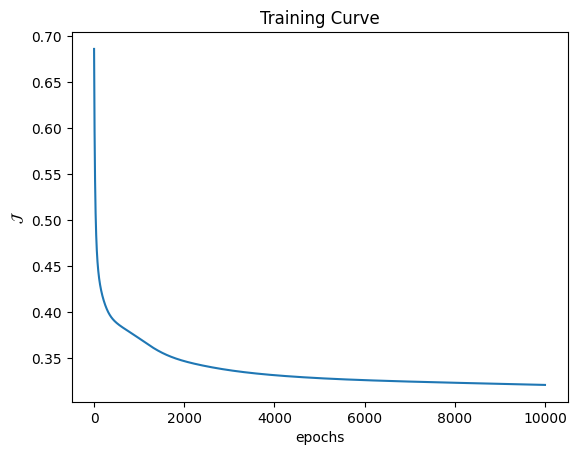

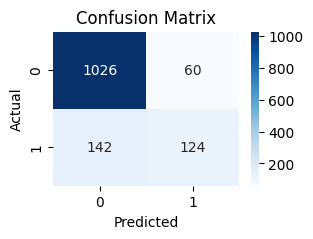

In [241]:
if __name__ == "__main__":
    main()